# Ranks in Pytorch

We compute the Tanks Connected (FC) layers for all Pytorch pretrained models

### Not used in Paper

http://pytorch.org/docs/master/torchvision/models.html



In [1]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn as nn

import numpy as np
import powerlaw

import sklearn
from sklearn.decomposition import TruncatedSVD

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
import import_ipynb
import RMT_Util

importing Jupyter notebook from RMT_Util.ipynb


/Users/charleshmartin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy version 1.14.3
scipy version 1.1.0
tensforflow version 1.10.1
keras version 2.2.2
sklearn version 0.19.1
powerlaw version 1.4.3


Using TensorFlow backend.


In [3]:
plt.rcParams['figure.figsize'] = [5,5]
matplotlib.rcParams.update({'font.size': 16})

In [21]:
def analyze_model(model, plot=True):
    min_svs = []
    rank_loss = []
    alphas = []
    Qs = []
    
    pretrained_model = model(pretrained=True)
    
    model_name = model.__name__
    model_name = model_name.replace("_",' ')
    
    for im, m in enumerate(pretrained_model.modules()):
        if isinstance(m, nn.Linear):
                
            W = np.array(m.weight.data.clone().cpu())
            M, N = np.min(W.shape), np.max(W.shape)
            Q=N/M 
            
            sv, _ = RMT_Util.singular_spectrum(W)
            smallest_sv = np.min(sv)
            min_svs.append(smallest_sv)
            
            rank = np.linalg.matrix_rank(W)
            rank_loss.append(M-rank)
            
            evals = sv*sv
            fit = powerlaw.Fit(evals, xmax=np.max(evals), verbose=False)  
            alpha = fit.alpha
            alphas.append(alpha)
            
            Qs.append(Q)
                
    return min_svs, rank_loss, alphas, Qs


### Generate data for Table

In [23]:
all_min_svs = []
all_rank_loss = []
all_alphas = []
all_Qs = []
for model in [models.alexnet, 
              models.densenet121, models.densenet161, models.densenet169, models.densenet201, 
              models.inception_v3,
              models.resnet101, models.resnet152, models.resnet18, models.resnet34, models.resnet50, 
              models.squeezenet1_0, models.squeezenet1_1,
              models.vgg11, models.vgg11_bn,
              models.vgg16, models.vgg16_bn,
              models.vgg19, models.vgg19_bn ]:
    #print(model)
    min_svs, rank_loss, alphas, Qs  = analyze_model(model, plot=False)
    all_min_svs.extend(min_svs)
    all_rank_loss.extend(rank_loss)
    all_alphas.extend(alphas)
    all_Qs.extend(Qs)


/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/torchvision/models/squeezenet.py:94: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  init.kaiming_uniform(m.weight.data)
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/torchvision/models/squeezenet.py:92: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.

Text(0.5,1,'PyTorch models (FC layers):\n mininum singular values')

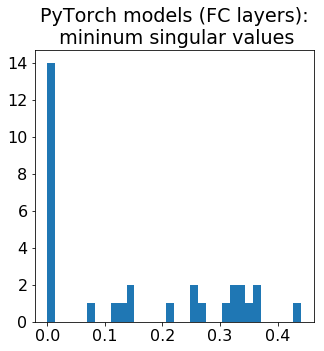

In [24]:
plt.hist(all_min_svs,bins=32);
plt.title("PyTorch models (FC layers):\n mininum singular values")

In [25]:
np.sort(min_svs)

array([4.1325119e-08, 2.5648581e-07, 3.2874706e-01], dtype=float32)

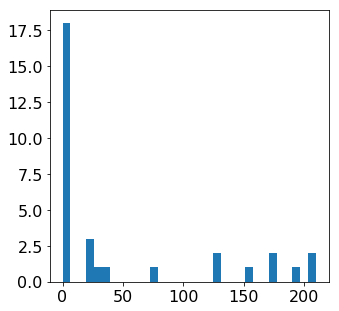

In [26]:
plt.hist(all_rank_loss,bins=32);


Text(0.5,0,'power law exponent $\\alpha$ ')

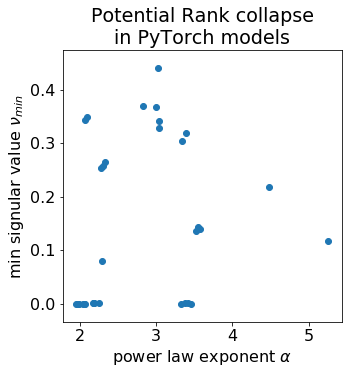

In [27]:
plt.scatter(all_alphas,all_min_svs)
plt.title("Potential Rank collapse\nin PyTorch models")
plt.ylabel(r"min signular value $\nu_{min}$ ")
plt.xlabel(r"power law exponent $\alpha$ ")

Text(0.5,0,'aspect ratio Q ')

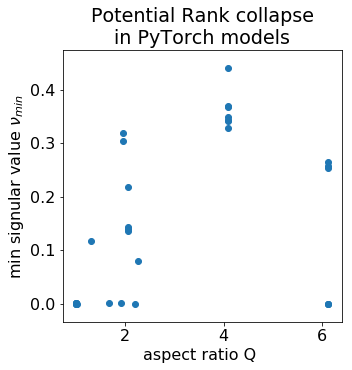

In [28]:
plt.scatter(all_Qs,all_min_svs)
plt.title("Potential Rank collapse\nin PyTorch models")
plt.ylabel(r"min signular value $\nu_{min}$ ")
plt.xlabel(r"aspect ratio Q ")

### Remove Q=1 cases

In [54]:
Qs = np.array(all_Qs)
ids = np.where(Qs>1.1)

In [55]:
SVs = np.array(all_min_svs)
SVs[ids]

array([8.0224544e-02, 4.4048291e-01, 6.8470186e-08, 3.7860233e-04,
       7.1013503e-04, 1.1697846e-01, 2.1774562e-01, 1.3959405e-01,
       1.3610721e-01, 3.0425721e-01, 3.1849155e-01, 1.4262442e-01,
       2.6473540e-01, 3.6889172e-01, 4.5462674e-08, 3.6713219e-01,
       2.5747973e-01, 3.4988722e-01, 4.8474369e-08, 3.4187394e-01,
       2.5341010e-01, 3.4379667e-01, 4.1325119e-08, 3.2874706e-01],
      dtype=float32)

Text(0.5,0,'aspect ratio Q ')

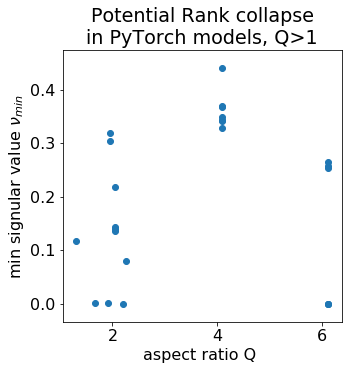

In [58]:
plt.scatter(Qs[ids],SVs[ids])
plt.title("Potential Rank collapse\nin PyTorch models, Q>1")
plt.ylabel(r"min signular value $\nu_{min}$ ")
plt.xlabel(r"aspect ratio Q ")

In [63]:
len(Qs[ids])

24